# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

We **TEAM 6**, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#one>2. Importing Packages</a>

<a href=#two>3. Loading Data</a>

<a href=#three>4. Exploratory Data Analysis (EDA)</a>

<a href=#four>5. Data Engineering</a>

<a href=#five>6. Modeling</a>

<a href=#six>7. Model Performance</a>

<a href=#seven>8. Model Explanations</a>

<a href=#one>9. Conclusion</a>

 <a id="one"></a>
## 1. Introduction




 <a id="one"></a>
## 2. Importing Packages




In [2]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso,\
LassoLars, BayesianRidge
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

import pickle    # to save and restore models

# for statistical testing
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 13

<a id="two"></a>
## 3. Loading the Data
<a class="anchor" id="1.1"></a>


In [3]:
train_df = pd.read_csv('df_train.csv')
pd.set_option("display.max.columns", None)
# Drop 'Unnamed: 0 ' column as it serves no purpose
train_df.drop('Unnamed: 0', axis= 1, inplace= True)
pd.set_option("display.max.rows", None)

<a id="three"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>




Exploratory data analysis (EDA) is used to analyse and investigate data sets and summarize their main characteristics, often employing data visualization methods. In this section, weather, and load shortfall data of the 5 cities in Spain will be explored using the following techniques:

- Univeriate Non-graphical – Descriptive statistics and Five number summary

- Univariate Graphical Analysis – Histogram, Density plot and  Box plots

- Multivariate Graphics Analysis – Heat map 


**4.1 Univariate Non-graphical Analysis**

In [3]:
# look at data statistics

In [4]:
train_df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [6]:
print('There are', len(train_df), 'rows and',train_df.shape[1], 'columns in the train set.')

There are 8763 rows and 48 columns in the train set.


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

In [8]:
train_df.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8.763000e+03,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,6695.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,190.544848,19.473392,2.425045,0.128906,0.039439,0.031912,1.377965e+03,0.000243,0.037818,0.000439,0.000205,773.527594,765.979687,1017.739549,774.658818,1012.051407,297.479527,1010.316920,291.337233,290.592152,724.722362,293.978903,65.247727,289.867648,291.157644,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,89.077337,28.053660,1.672895,0.634730,0.175857,0.557264,1.407314e+04,0.003660,0.152639,0.003994,0.011866,77.313315,88.142235,10.046124,71.940009,9.506214,8.875812,22.198555,7.565692,7.162274,115.846537,7.920986,19.262322,6.907402,7.273538,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,118.166667,0.000000,1.000000,0.000000,0.000000,0.000000,1.014000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.000000,800.000000,1010.333333,291.312750,1012.333333,285.550167,285.150000,700.333333,288.282917,51.333333,284.783333,285.483333,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,200.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.018000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.333333,1019.000000,800.000000,1015.000000,297.101667,1017.333333,291.037000,290.176667,800.000000,293.323333,67.000000,289.550000,290.150000,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,260.000000,33.333333,3.333333,0.000000,0.000000,0.000000,1.022000e+03,0.000000,0.000000,0.000000,0.000000,800.666667,801.000000,1024.000000,800.000000,1018.000000,304.150000,1022.000000,297.248333,296.056667,801.666667,299.620333,81.333333,294.820000,296.855000,296.816667,

In [10]:
# plot relevant feature interactions

**4.2 Univariate Graphical Analysis**

The techniques below are used to understand each attribute independently. 


- Histogram

Histograms group data into bins and provide a count of the number of observations in each bin. From the shape of the bins one can tell whether an attribute is Gaussian’, skewed or even has an exponential distribution. It also assist at identifying possible outliers.

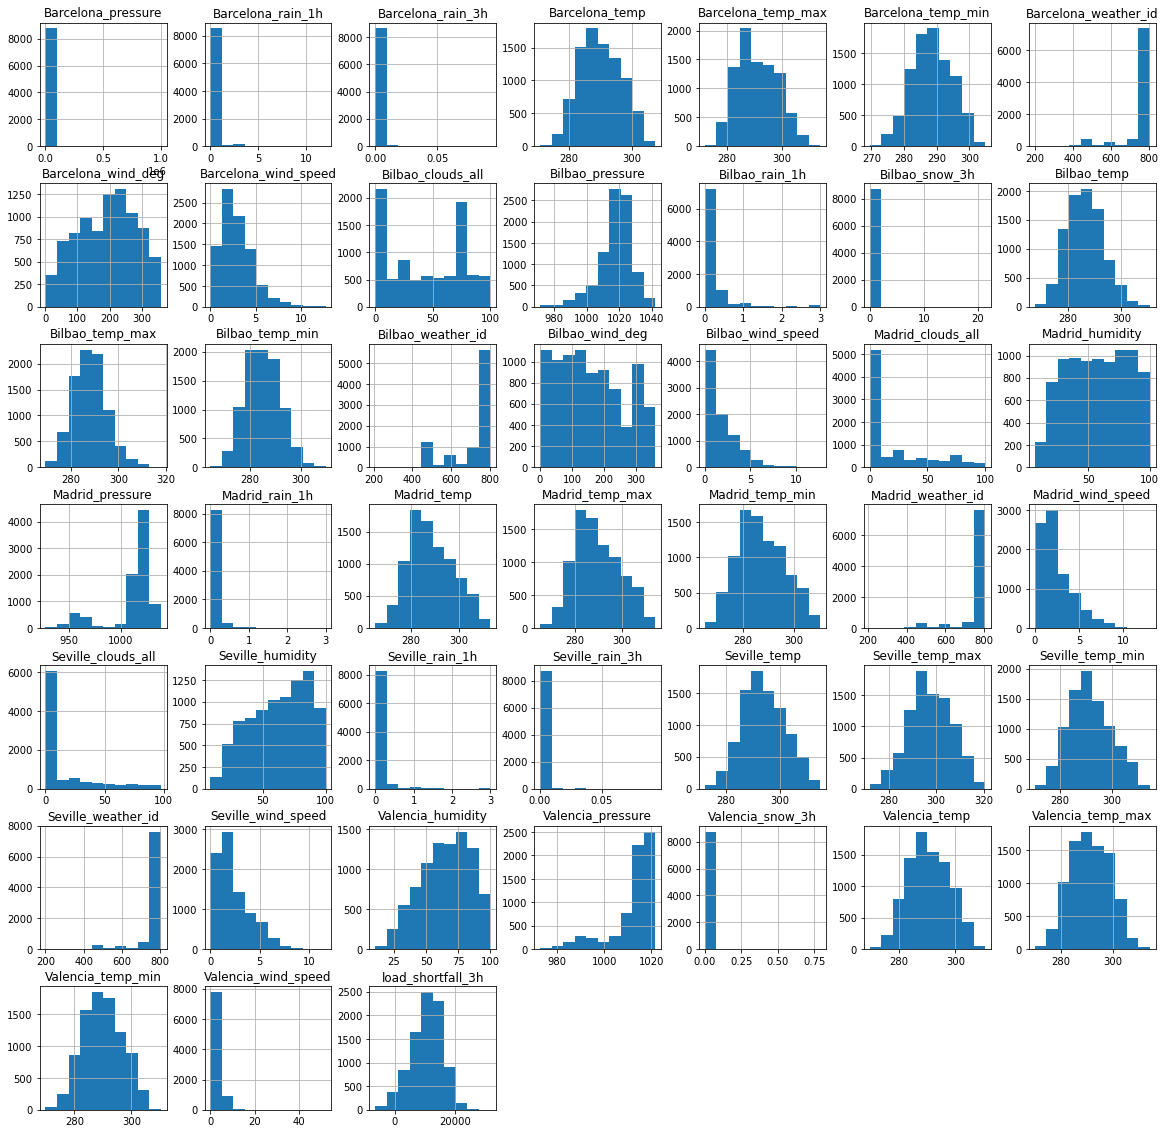

In [9]:
train_df.hist(figsize=(20,20))
plt.show()

From the observation above **Madrid_wind_speed**, **Seville_wind_speed** and **Bilbao _wind_speed** have exponetial distribution. **Madrid_temp_max** has a Gaussian or nearly Gaussian distribution.This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.


- Density Plots

Density plots are another way of getting a quick idea of the distribution of each attribute. The plots look like an abstracted histogram with a smooth curve drawn through the top of each bin, much like your eye tried to do with the histograms.

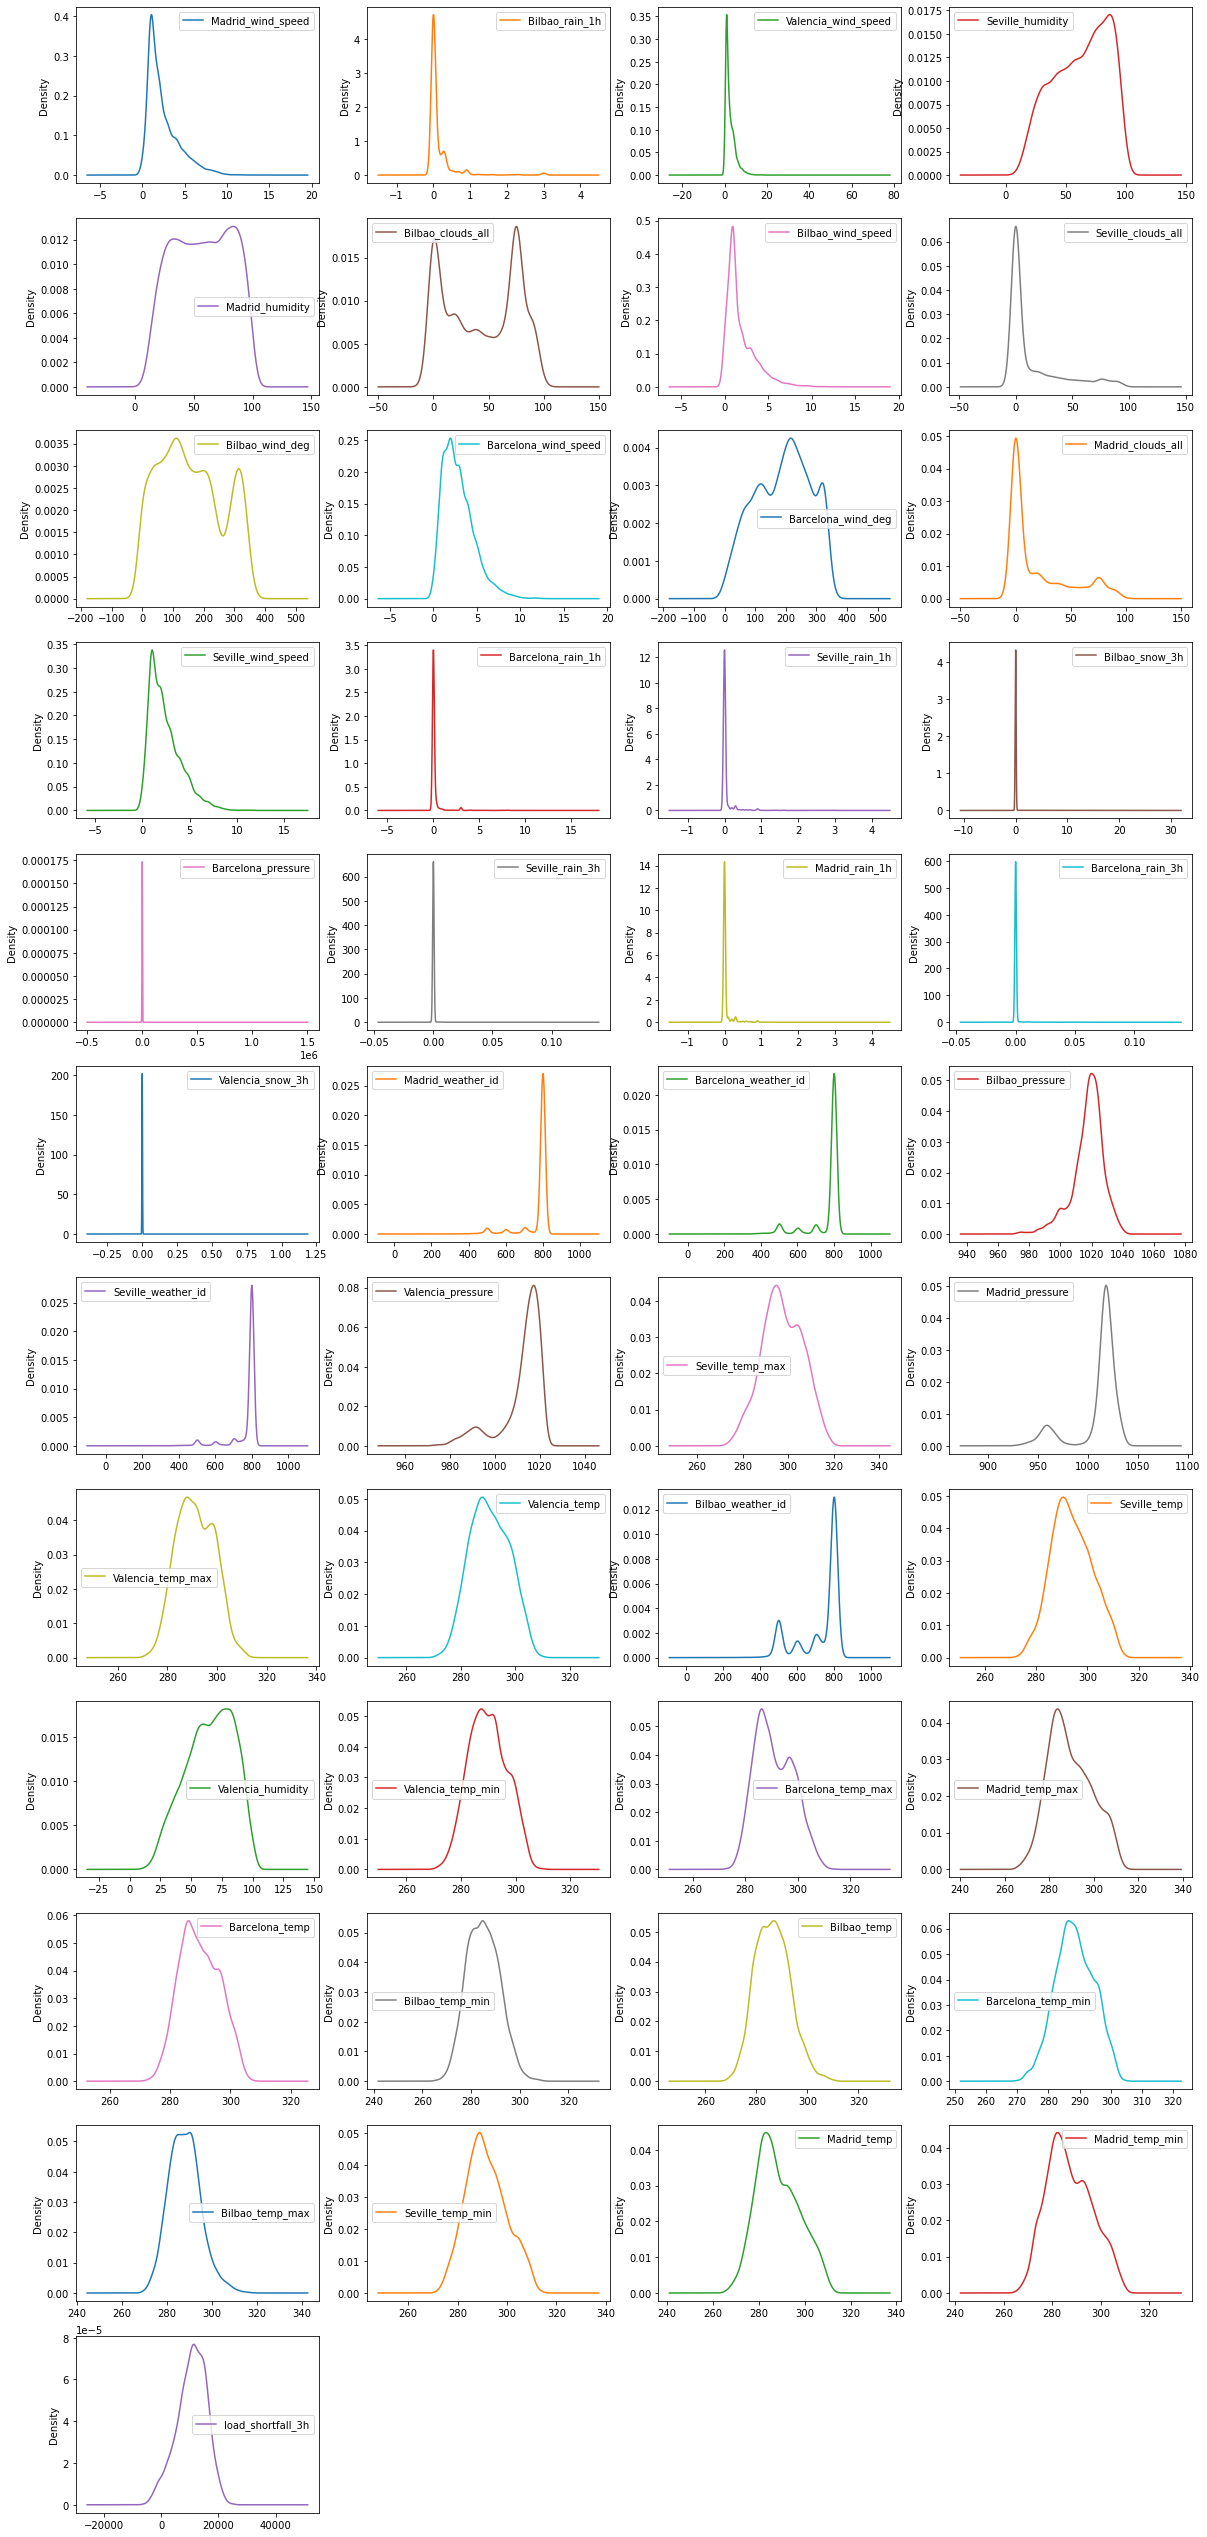

In [8]:
train_df.plot(kind= 'density', subplots=True, layout=(13,4), sharex= False, figsize= (20,50))
plt.show()

- Box and Whisker Plots

Boxplots summarize the distribution of each attribute, drawing a line for the median (middle value) and a box 
around the 25th and 75th percentiles (the middle 50% of the data). The whiskers give an idea of the spread of the data and dots outside of the whiskers show candidate outlier values (values that are 1.5 times greater than the size of spread of 
the middle 50% of the data).

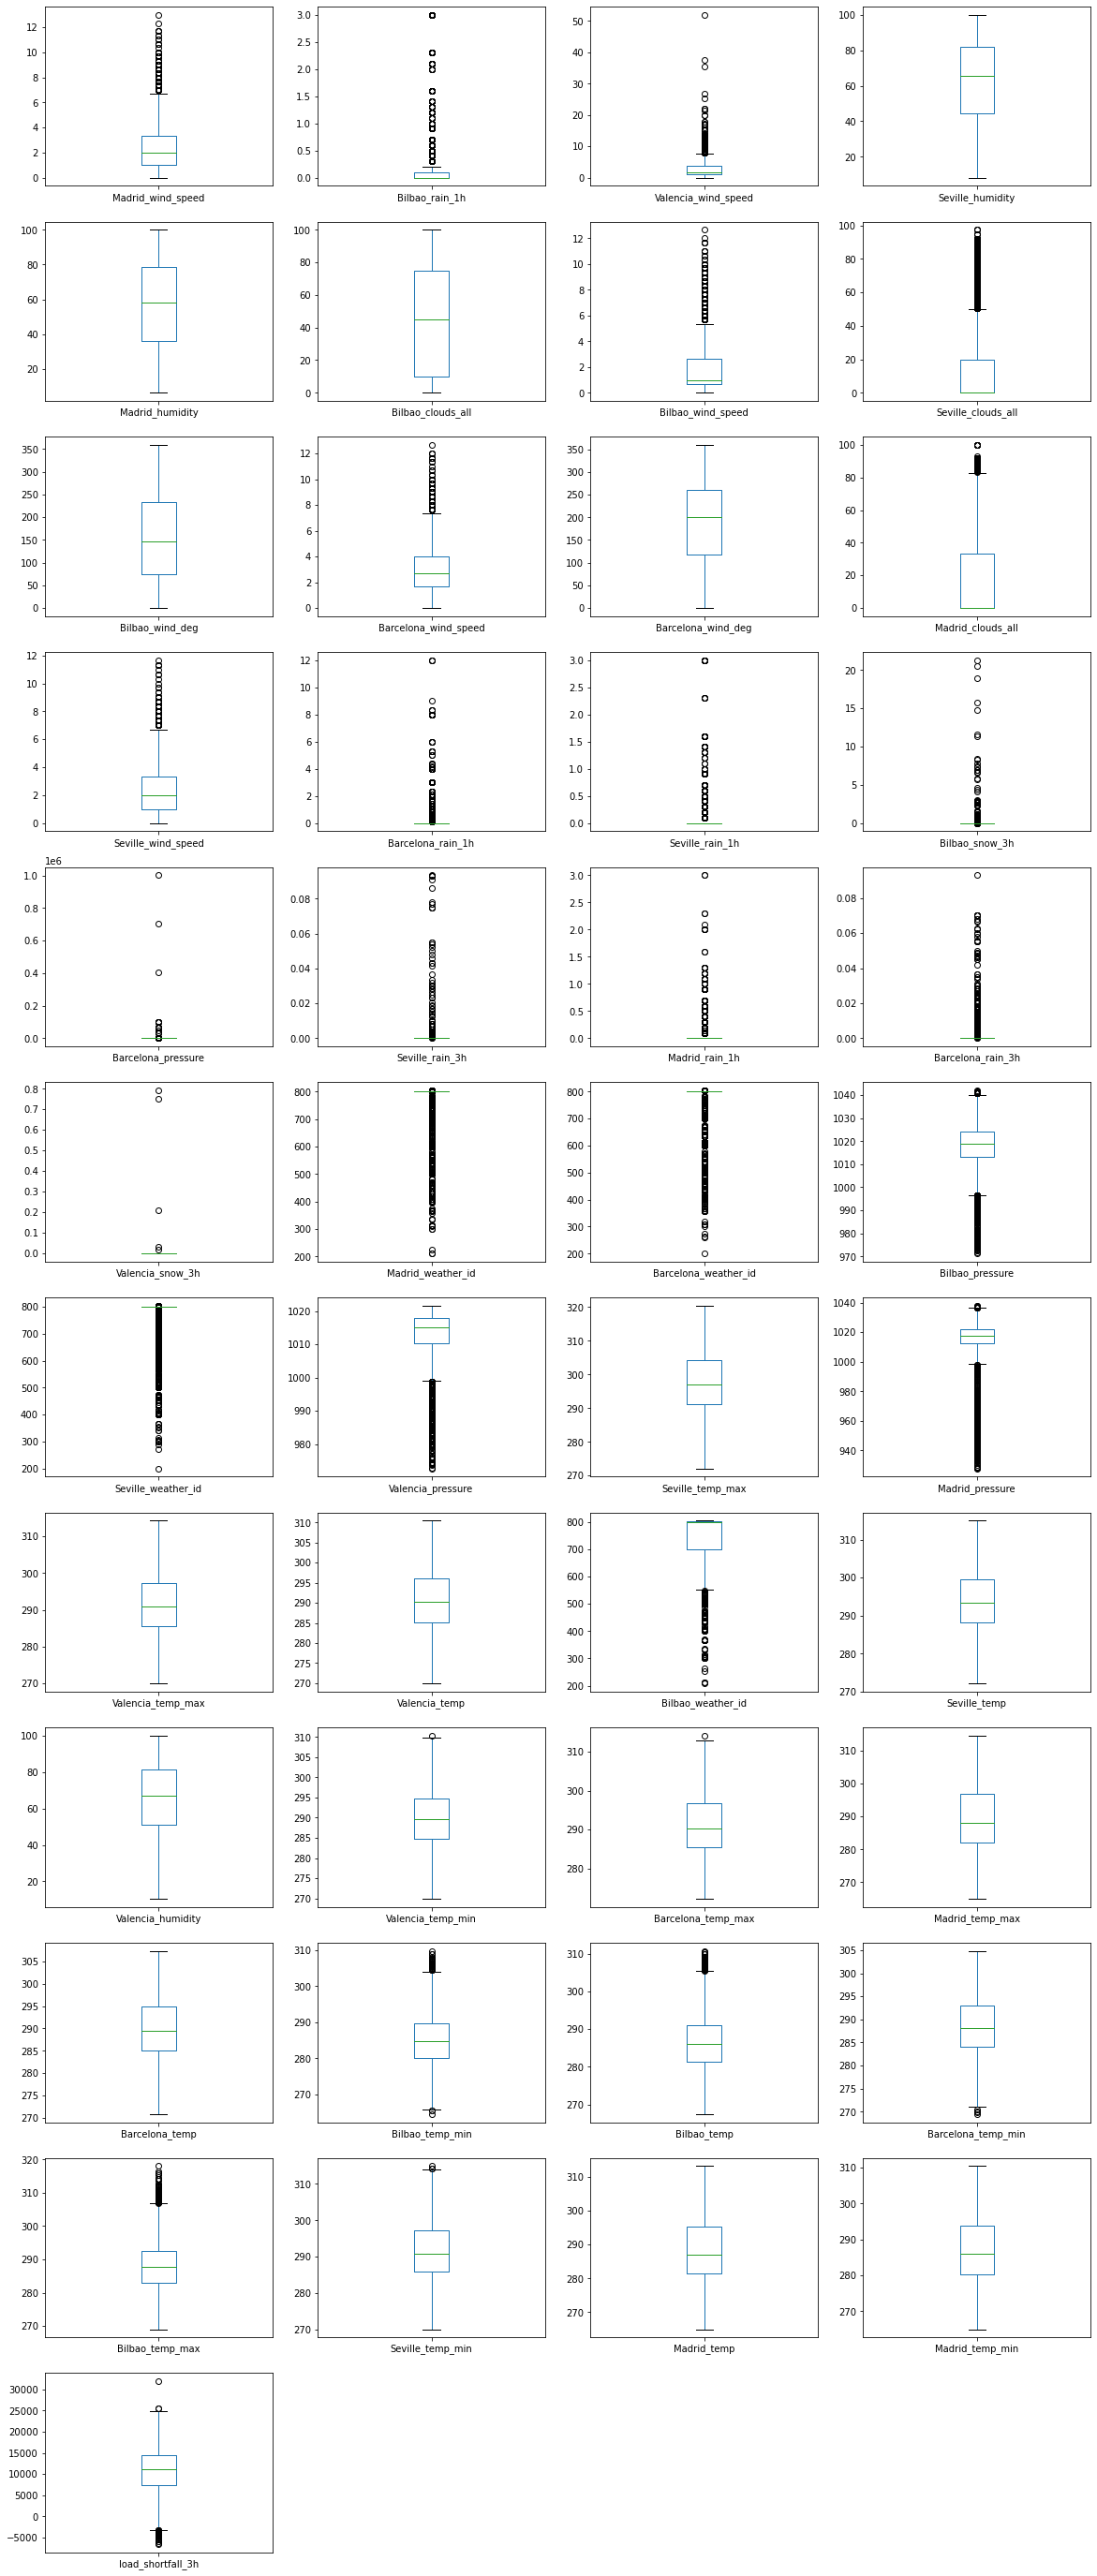

In [9]:
train_df.plot(kind='box', subplots=True, layout=(12,4), sharex=False, sharey=False, figsize= (20,50))
plt.show()


From the plots used above, the data distribution for each attribute is clearer in the box plots than the histograms.

**4.3 Multivariate Graphic Analysis**

This section shows examples of plots with interactions between multiple variables.

- Correlation Matrix Plot

Correlation gives an indication of how related the changes are between two variables. When two variables change in the same direction they are positively correlated. If the change in opposite directions together (one goes up, one goes down), then they are negatively correlated.

The correlation between each pair of attributes can be calculated.This is called a correlation matrix and it can be plotted to in order to see which variables are correlated to each other. This is useful to know, because some machine learning algorithms like linear and logistic regression can have poor performance when there are highly correlated input variables in your data.

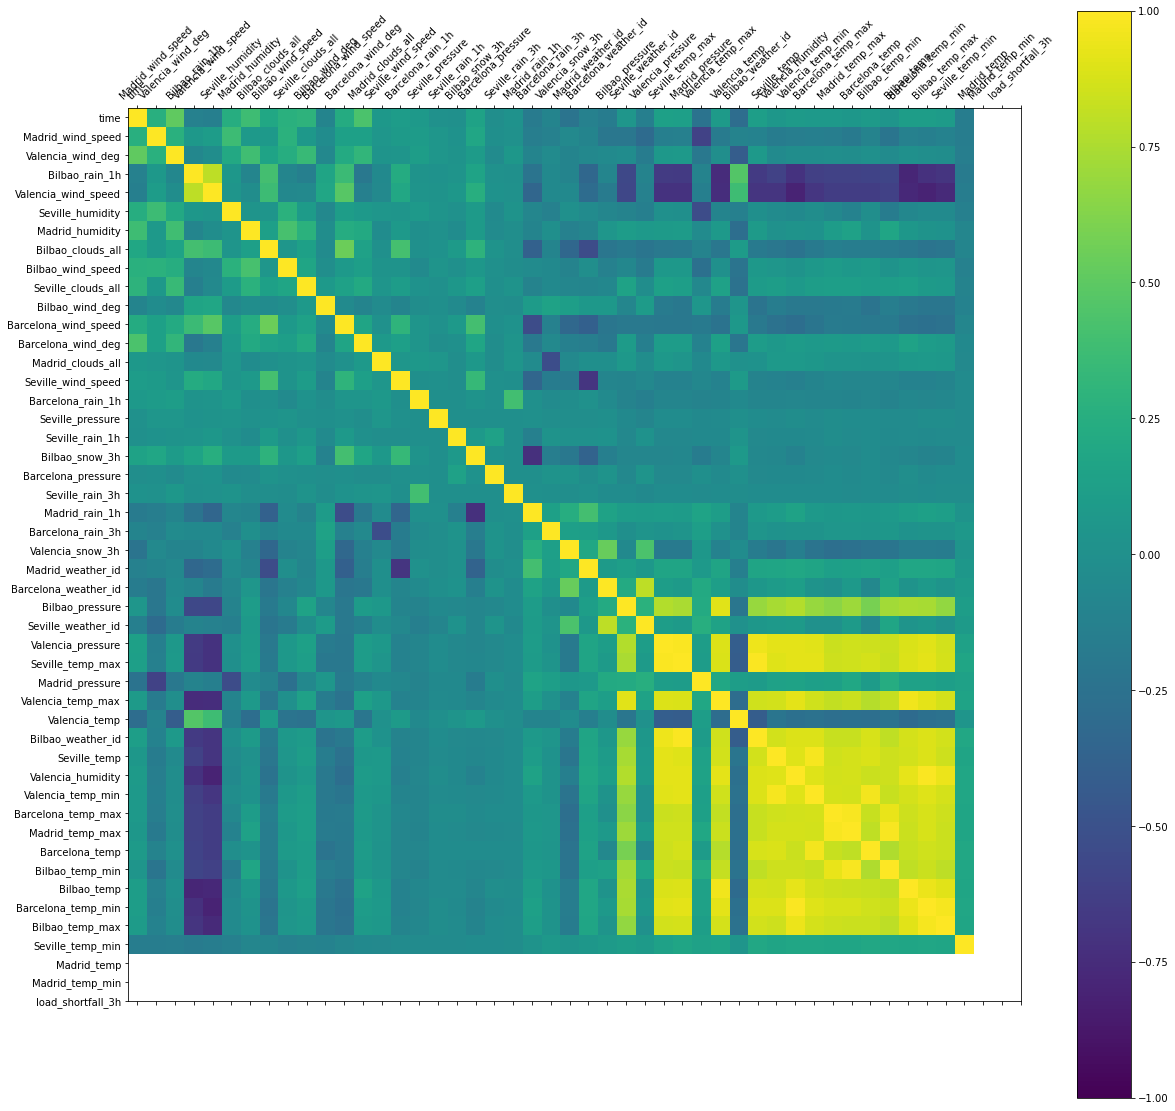

In [10]:
correlations = train_df.corr()
names = train_df.columns
fig = plt.figure(figsize= (20,20))
ax = fig.add_subplot(111)

cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,48,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation = 45)
ax.set_yticklabels(names)
plt.show()

From the observation above the matrix is symmetrical, the bottom left of the matrix is the same as the top right. This is useful as one is able to see the two different views on the same data in one plot. Each variable is perfectly positively correlated with each other in the diagonal line from top left to bottom right.

- Pearson Correlation Heatmap

This is similar to Correlation Matrix Plot but it is filled, the Pearson correlation between (1, -1). Pearson’s correlation coefficient is the test statistics that measures the statistical relationship, or association, between two continuous variables.  It is known as the best method of measuring the association between variables of interest because it is based
on the method of covariance.  It gives information about the magnitude of the association, or correlation, as well as the direction of the relationship.




Text(0.5, 1.0, 'pearson correlation')

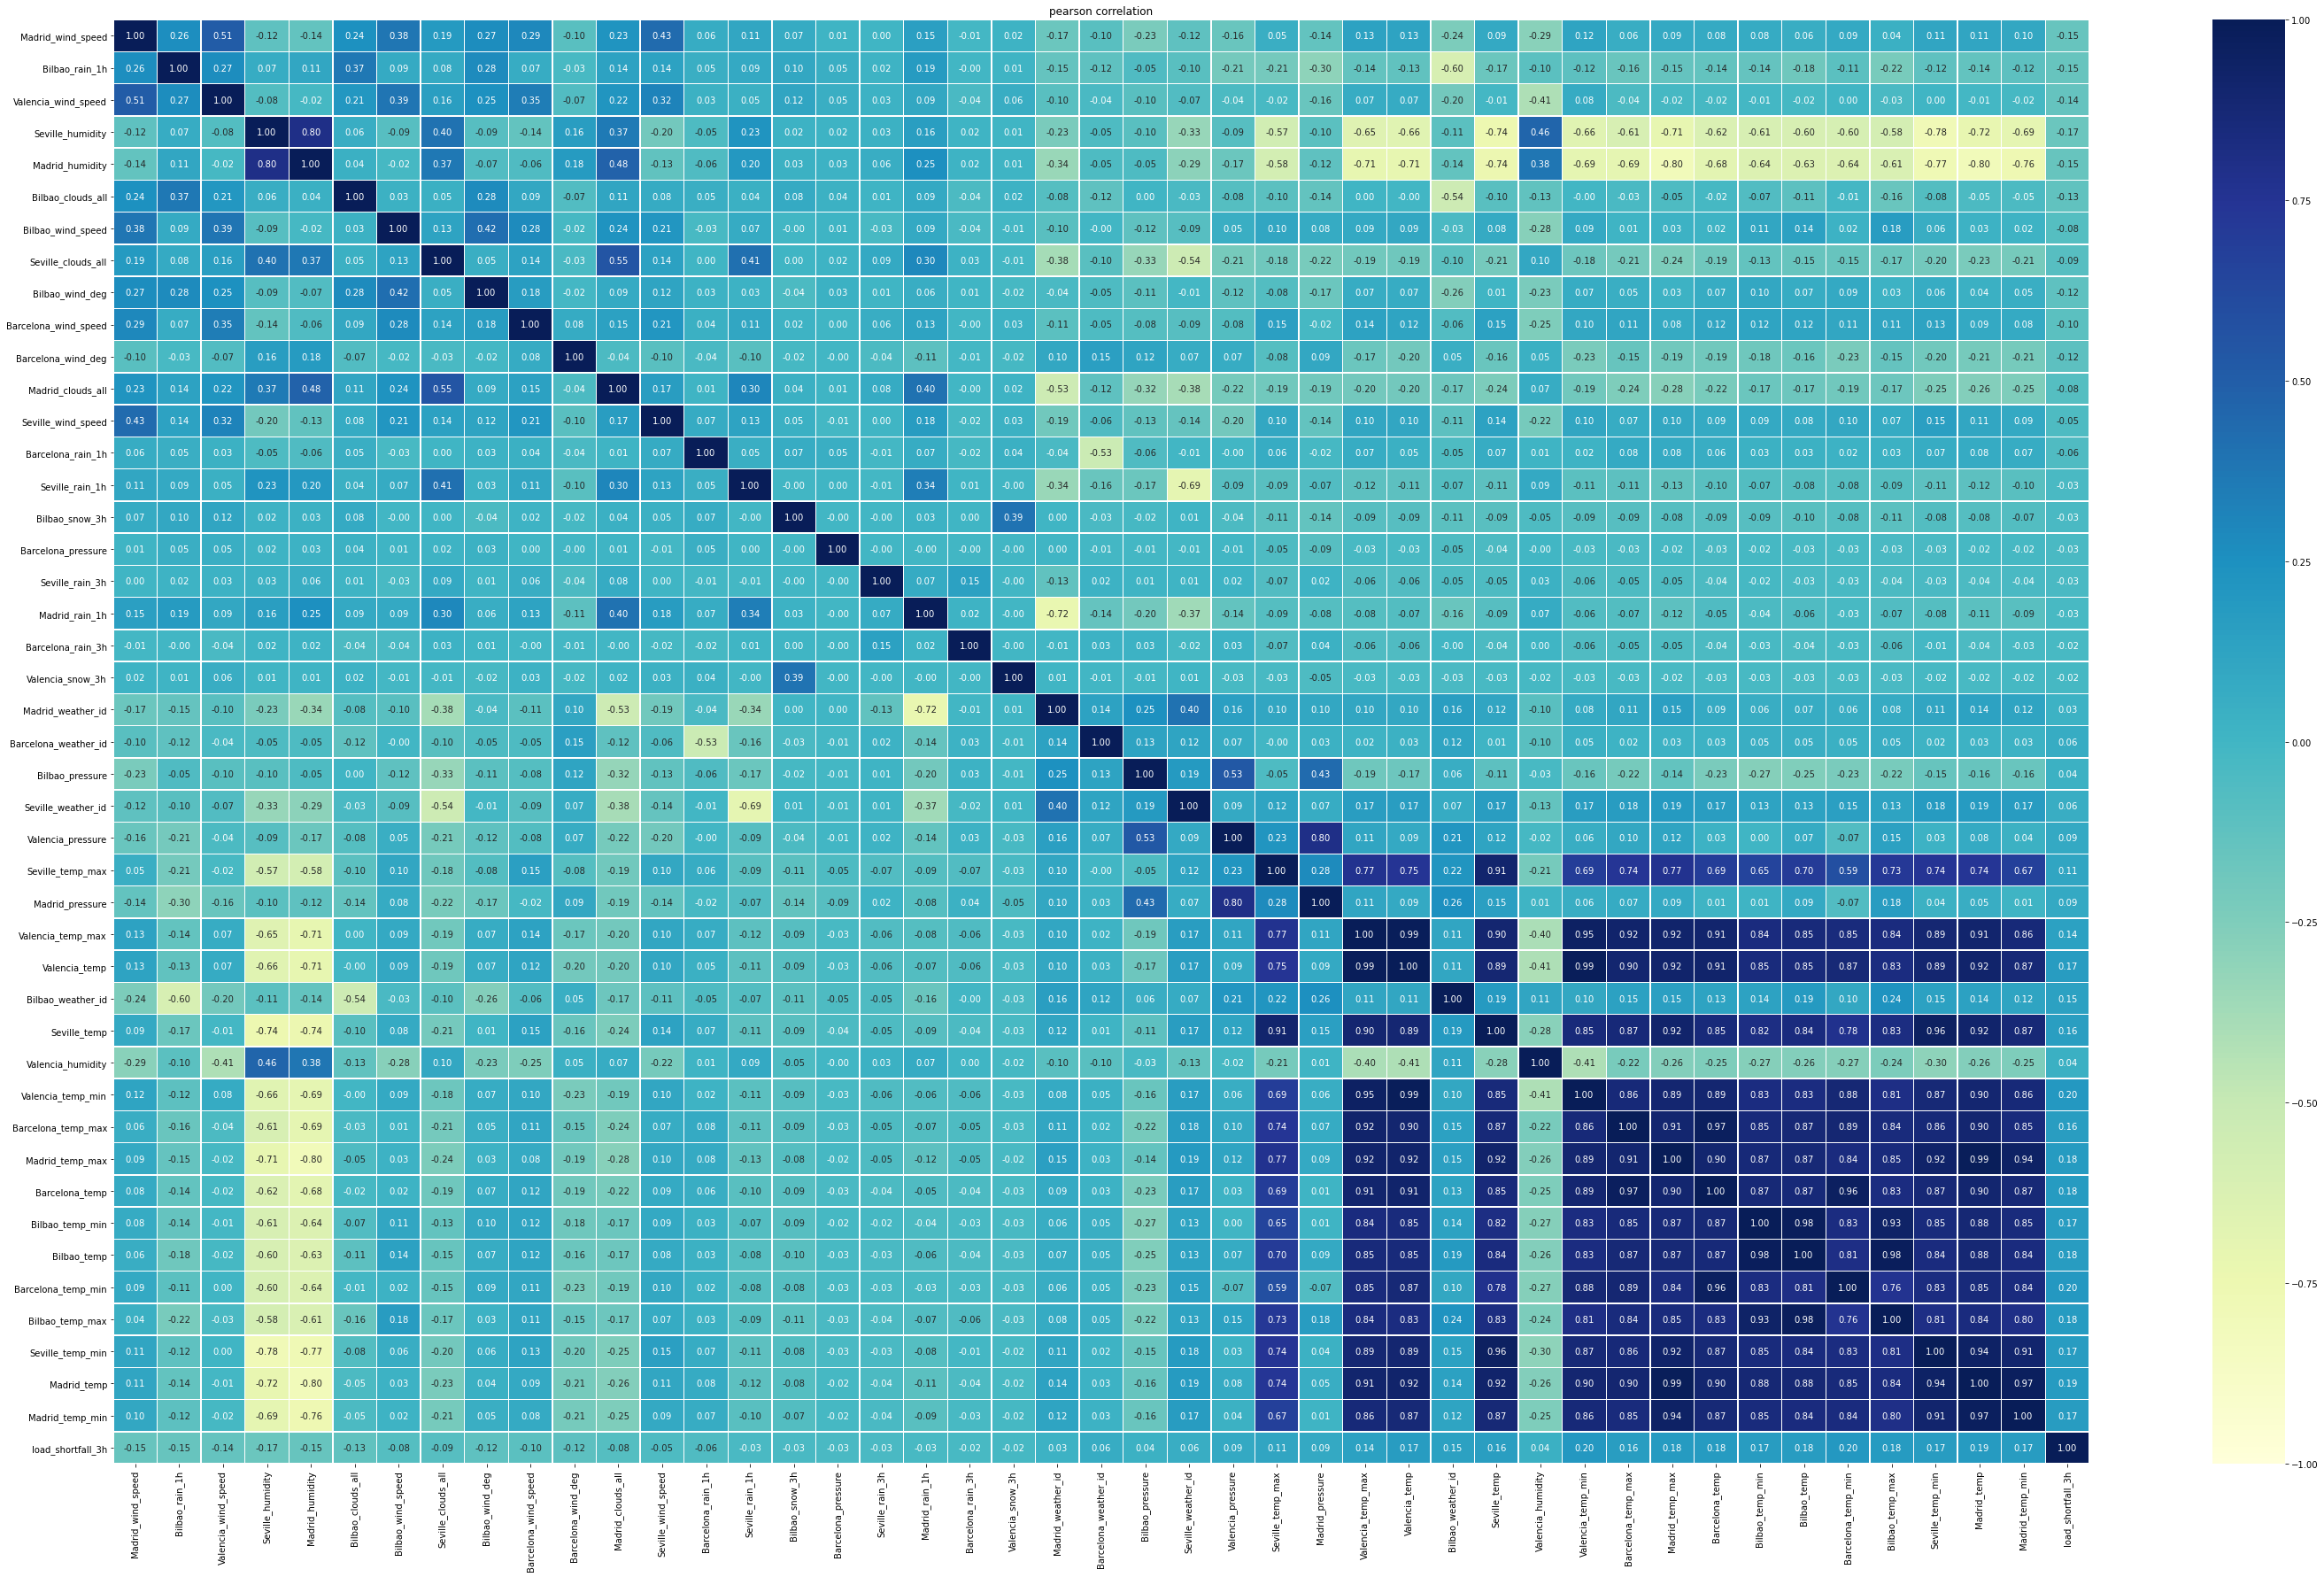

In [12]:
# Strength of Association
#         Positive     Negative
#small   .1 to .3      -.1 to -.3
#medium  3. to .5      -.3 to -.5
#large    .5 to 1       -.5 to -1

corr_matrix = train_df.corr(method="pearson")
plt.figure(figsize=(50,30))
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

In [13]:
# evaluate correlation

In [ ]:
# see above

In [16]:
# have a look at feature distributions

In [ ]:
# see above

<a id="four"></a>
## 5. Data Engineering
<a class="anchor" id="1.1"></a>


**5.1 Checking for Missing Values**

In [12]:
# check for null values

train_df.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

About **2068** values in the **Valencia_pressure** column are missing. Which is about 24% of the data missing in that attribute. Therefore data (either the mean or median) wll be imputed into the missing values. 

Checking which values to impute: 

In [14]:
print('mean of Valencia_pressure col:', train_df['Valencia_pressure'].mean())
print('median of Valencia_pressure col:', train_df['Valencia_pressure'].median())


# The mean an median of the column containting null values is similar,
# thus the null value will be replaced with the mean.

train_df['Valencia_pressure'] = train_df['Valencia_pressure'].fillna(train_df['Valencia_pressure'].mean())

mean of Valencia_pressure col: 1012.0514065222828
median of Valencia_pressure col: 1015.0


Considering the EDA above not all the columns have the same data typle such as the Valencia_wind_deg and Seville_pressure:

In [16]:
# Check dtype of Valencia_wind_deg and why it is an object compared to similar
# numeric columns.

print('dtype of Valencia_wind_deg:',train_df['Valencia_wind_deg'].dtype)
print('unique values of Valencia_wind_deg:', train_df['Valencia_wind_deg'].unique())
train_df[['Valencia_wind_deg','Bilbao_wind_deg', 'Barcelona_wind_deg']].head()

dtype of Valencia_wind_deg: object
unique values of Valencia_wind_deg: ['level_5' 'level_10' 'level_9' 'level_8' 'level_7' 'level_6' 'level_4'
 'level_3' 'level_1' 'level_2']


,Valencia_wind_deg,Bilbao_wind_deg,Barcelona_wind_deg
0,level_5,223.333333,42.666667
1,level_10,221.000000,139.000000
2,level_9,214.333333,326.000000
3,level_8,199.666667,273.000000
4,level_7,185.000000,260.000000


Valencia_wind_deg column data contain strings and is not comparable to similar colomns, because there are similar columns with the required numerical data, Valencia_wind_deg column will be dropped.

In [15]:
# Check dtype of Seville_pressure and why it is an object compared to similar
#  numeric columns. 

print('dtype of Seville_pressure:',train_df['Seville_pressure'].dtype)
print('unique values of Seville_pressure:', train_df['Seville_pressure'].unique())
train_df[['Seville_pressure','Barcelona_pressure', 'Bilbao_pressure']].tail()

dtype of Seville_pressure: object
unique values of Seville_pressure: ['sp25' 'sp23' 'sp24' 'sp21' 'sp16' 'sp9' 'sp15' 'sp19' 'sp22' 'sp11'
 'sp8' 'sp4' 'sp6' 'sp13' 'sp17' 'sp20' 'sp18' 'sp14' 'sp12' 'sp5' 'sp10'
 'sp7' 'sp3' 'sp2' 'sp1']


,Seville_pressure,Barcelona_pressure,Bilbao_pressure
8758,sp23,1021.000000,1017.666667
8759,sp23,1019.000000,1015.333333
8760,sp22,1015.666667,1017.333333
8761,sp23,1015.000000,1020.333333
8762,sp25,1016.000000,1023.666667


Seville_pressure column data contain strings and is not comparable to similar colomns, because there are similar columns with the required numerical data, Seville_pressure column will be dropped.

In [17]:
# both Valencia_wind_deg and Seville_pressure dropped
train_df.drop('Valencia_wind_deg', axis= 1, inplace= True)
train_df.drop('Seville_pressure', axis= 1, inplace= True)

**5.2 Create New Features**

- Time Based Feature 

In [20]:
# Transform train_df['time'] to datetime

train_df['time'] = pd.to_datetime(train_df['time'], format = '%Y-%m-%d %H:%M:%S')

Splitting the time column in order to see if year, month, day and hour, have a significant Pearson correlation.

In [22]:
#train_df['year'] = train_df['time'].dt.year     -year value is arbitrary where power is concerned
train_df['month'] = train_df['time'].dt.month   # power varies per month depending on season
train_df['day'] = train_df['time'].dt.day       # power varies depending on day of the week
train_df['hour'] = train_df['time'].dt.hour     # power varies depending on the time of the day

In [23]:
train_df[['month', 'day', 'hour']] = train_df[['month', 'day', 'hour']].astype('category')

In [ ]:
# engineer existing features

In [24]:
#train_df[['Valencia_wind_deg','Seville_pressure']].head()

In [167]:
#train_df = pd.get_dummies(train_df,columns = ['Valencia_wind_deg'])

In [170]:
#train_df = pd.get_dummies(train_df,columns = ['Seville_pressure'])

In [ ]:
# If we look at the Pearson Correlation above we can see that most
# variables from the get_dummies df is non significant,therefore we will
# drop thses columns

# If get_dummies is run, reset kernel to get original data back.

**5.3 Calculate Features Importance**


I section a  correlation between 2 variables will be tested in order to select an important attribute. Since they are both numerical, Pearson’s Correlation Coefficient will be tested:
- Assuming that two variables are independent (null hypothesis), it tests whether two samples have a linear relationship.
- If the p-value is small enough (<0.05), the null hypothesis can be rejected and we can say that the two variables are probably dependent.



In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  8763 non-null   datetime64[ns]
 1   Madrid_wind_speed     8763 non-null   float64       
 2   Bilbao_rain_1h        8763 non-null   float64       
 3   Valencia_wind_speed   8763 non-null   float64       
 4   Seville_humidity      8763 non-null   float64       
 5   Madrid_humidity       8763 non-null   float64       
 6   Bilbao_clouds_all     8763 non-null   float64       
 7   Bilbao_wind_speed     8763 non-null   float64       
 8   Seville_clouds_all    8763 non-null   float64       
 9   Bilbao_wind_deg       8763 non-null   float64       
 10  Barcelona_wind_speed  8763 non-null   float64       
 11  Barcelona_wind_deg    8763 non-null   float64       
 12  Madrid_clouds_all     8763 non-null   float64       
 13  Seville_wind_speed

In [27]:
x = [col for col in train_df.drop('load_shortfall_3h',axis= 1).columns]
x_col = x[1:]       # This is to remove time variable
y = "load_shortfall_3h"

p_corr_list = []    # This is a list of all the features with a Pearson corr > 0.1 and < -0.1.
                    # This is to ensure there is atleast a small correlation.
for x in x_col:
    coeff, p = scipy.stats.pearsonr(train_df[x], train_df[y])
    coeff, p = round(coeff, 3), round(p, 3)
    conclusion = "Significant" if p < 0.05 else "Non-Significant"
    print(x, " Pearson Correlation:", coeff, conclusion, "(p-value: "+str(p)+")")
    if coeff <= -0.1 or coeff >= 0.1:
        p_corr_list.append(x)



Madrid_wind_speed  Pearson Correlation: -0.151 Significant (p-value: 0.0)
Bilbao_rain_1h  Pearson Correlation: -0.153 Significant (p-value: 0.0)
Valencia_wind_speed  Pearson Correlation: -0.143 Significant (p-value: 0.0)
Seville_humidity  Pearson Correlation: -0.167 Significant (p-value: 0.0)
Madrid_humidity  Pearson Correlation: -0.151 Significant (p-value: 0.0)
Bilbao_clouds_all  Pearson Correlation: -0.127 Significant (p-value: 0.0)
Bilbao_wind_speed  Pearson Correlation: -0.082 Significant (p-value: 0.0)
Seville_clouds_all  Pearson Correlation: -0.092 Significant (p-value: 0.0)
Bilbao_wind_deg  Pearson Correlation: -0.121 Significant (p-value: 0.0)
Barcelona_wind_speed  Pearson Correlation: -0.104 Significant (p-value: 0.0)
Barcelona_wind_deg  Pearson Correlation: -0.116 Significant (p-value: 0.0)
Madrid_clouds_all  Pearson Correlation: -0.082 Significant (p-value: 0.0)
Seville_wind_speed  Pearson Correlation: -0.048 Significant (p-value: 0.0)
Barcelona_rain_1h  Pearson Correlation

In [41]:
print(len(p_corr_list))

print(p_corr_list)


27
['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Seville_temp_max', 'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id', 'Seville_temp', 'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min', 'month', 'hour']


According Pearson Correlation all the features are Significant:

The largerst correlation is 'Valencia_temp_min' = 0.0.202,

There are 25 variables in p_corr_list with a corr of > 0.1 or <-0.1

In [30]:
rain_1h_columns = ['Bilbao_rain_1h', 'Barcelona_rain_1h', 'Seville_rain_1h', 'Madrid_rain_1h']

# Percentage unique values in all rain_1h columns
# As we can see the unique percentage is less than 1%.
# Thus only less than 1% of the values is unique.

# Drop these columns and test models to see if there is a difference.

# Model performance did increase slightly, thus drop columns.

(train_df[rain_1h_columns].nunique()/ 8763) *100



Bilbao_rain_1h       0.228232
Barcelona_rain_1h    0.353760
Seville_rain_1h      0.193997
Madrid_rain_1h       0.216821
dtype: float64

In [31]:
weather_id_columns = ['Madrid_weather_id','Barcelona_weather_id','Seville_weather_id', 'Bilbao_weather_id']

# Percentage unique values in all weather_id columns
# As we can see the unique percentage is 4% or less.
# Thus only 4% or less of the values is unique.

# Drop these columns and test models to see if there is a difference.

# Model performance did decrease slightly, Thus weather_id_columns will not be dropped.

(train_df[weather_id_columns].nunique()/ 8763) *100

Madrid_weather_id       3.297957
Barcelona_weather_id    3.069725
Seville_weather_id      3.434897
Bilbao_weather_id       4.062536
dtype: float64

**5.4 Selecting Features per Model**

In this section, three groups of features are selected in order to identify which group of features produce the best model.

- Group 1 features will be used on all  _model_1 models.

In [30]:
# Group 1 feature selection

# This is the standard model, features will be added and remove from train_df_1.

train_df_1 = train_df.copy()

train_df_1 = train_df_1.drop('time', axis= 1)
# date time object cannot be use in the model.
train_df_1.shape


# train_df_1.columns = ['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
#                       'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all',
#                       'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg',
#                       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all',
#                       'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h',
#                       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
#                       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
#                       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
#                       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
#                       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
#                       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
#                       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
#                       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
#                       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
#                       'Madrid_temp', 'Madrid_temp_min', 'load_shortfall_3h', 'month', 'day',
#                       'hour']

# Features fr api test
#train_df_1 = train_df_1[['Madrid_wind_speed','Bilbao_rain_1h','Valencia_wind_speed','load_shortfall_3h']]

(8763, 48)

In [31]:
train_df_1.columns

Index(['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all',
       'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg',
       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all',
       'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
       'Madrid_temp', 'Madrid_temp_min', 'load_shortfa

- Group 2 features will be used on all _model_2 models.

In [32]:
# Group 2 feature selection

train_df_2 = train_df_1.drop(rain_1h_columns, axis=1)    # Drop coulmns with postfix rain_1h_columns, that may represent hourly data
                                                         # on a 3 hourly data set.
                                                         # Model performance increaed slightly.

#train_df_2 = train_df_2.drop(weather_id_columns, axis=1)  # Drop weather_id_columns
                                                          # Model performance did decrease slightly, Thus weather_id_columns will not be dropped. 

train_df_2.shape


NameError: name 'rain_1h_columns' is not defined

In [33]:
train_df_2.columns

NameError: name 'train_df_2' is not defined

- Group 3 features will be used on all _model_3 models. 

In [35]:
# Group 3 feature selection
# Here we will use the features in p_corr_list.
# Features in this list have a pearonson corr score of >0.1 and <-0.1.

train_df_3 = train_df_1[p_corr_list] 
train_df_3['load_shortfall_3h'] = train_df_1['load_shortfall_3h']

train_df_3.shape


# Featurs for all model 3

#train_df_3 = train_df_1[['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
#                           'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all',
#                           'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
#                           'Seville_temp_max', 'Valencia_temp_max', 'Valencia_temp',
#                           'Bilbao_weather_id', 'Seville_temp', 'Valencia_temp_min',
#                           'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
#                           'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
#                           'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min',
#                           'month', 'hour', 'load_shortfall_3h']]

(8763, 28)

In [36]:
train_df_3.columns

Index(['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Seville_temp_max', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min',
       'month', 'hour', 'load_shortfall_3h'],
      dtype='object')

In [96]:
# So far Model 1 and Model 3 features produce the best results for
# LinearRegression() model. 

<a id="five"></a>
## 6. Modelling
<a class="anchor" id="1.1"></a>


**6.1 Splitting the Data**

In [38]:
#Split 1 for 

y1 = train_df_1['load_shortfall_3h']
X1 = train_df_1.drop('load_shortfall_3h', axis= 1)

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state= PARAMETER_CONSTANT)

#scaler = StandardScaler()
#scaler.fit(X_train)  #  - fit only on training data
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [39]:
# Split 2

y2 = train_df_2['load_shortfall_3h']
X2 = train_df_2.drop('load_shortfall_3h', axis= 1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state= PARAMETER_CONSTANT)


NameError: name 'train_df_2' is not defined

In [40]:
# Split 3

y3 = train_df_3['load_shortfall_3h']
X3 = train_df_3.drop('load_shortfall_3h', axis= 1)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state= PARAMETER_CONSTANT)

#scaler3 = StandardScaler()
#scaler3.fit(X_train3)  # - fit only on training data
#X_train = scaler3.transform(X_train3)
#X_test = scaler3.transform(X_test3)

 **6.2 Machine Learning Models**

1. LinearRegression() models

In [41]:
# # LinearRegression Model 1

linear_model_1 = LinearRegression()     # Initialize the mdoel

linear_model_1.fit(X_train,y_train)   #training the algorithm

linear_model_1_pred = linear_model_1.predict(X_test)  # predicting the result

In [42]:
# this model will be pickled and implemented in the api,

model_save_path = 'linear_model_1.pkl'

with open(model_save_path, 'wb') as file:
    pickle.dump(linear_model_1, file)

In [44]:
# Table of Predicted values and Actula values:

df1 = pd.DataFrame({'Actual': y_test, 'Predicted':linear_model_1_pred })
df1.head()

,Actual,Predicted
7596,9924.666667,12392.776336
2092,7028.333333,9393.422516
8558,13275.333333,11120.434970
3496,635.000000,9949.542918
5961,5232.666667,8913.618210


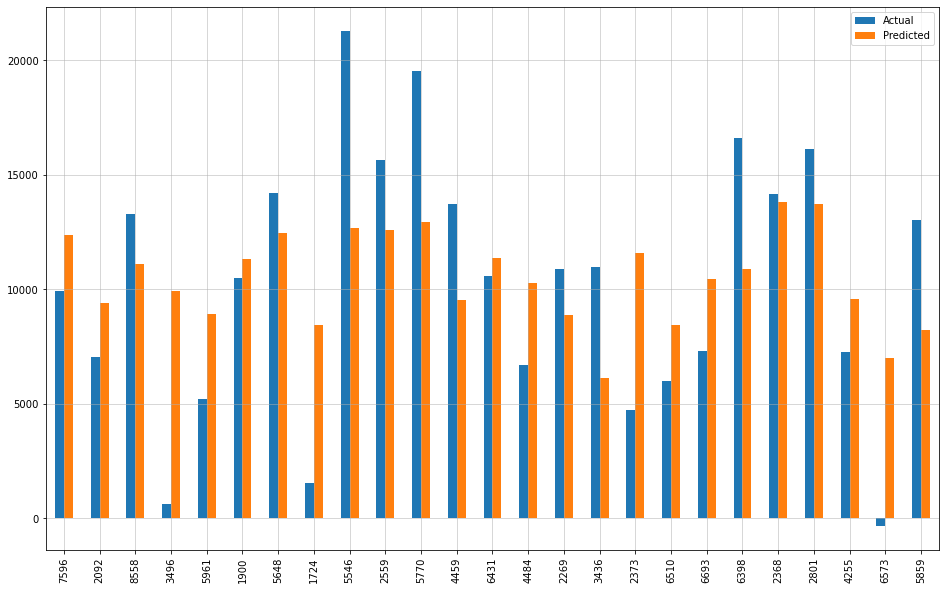

In [45]:
# Histogram of a subset of Predicted values and Actula values:

df1_plot = df1.head(25)
df1_plot.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()

In [16]:
 #LinearRegression Model 2

In [46]:
# linear_model_2

linear_model_2 = LinearRegression()     # Initialize the mdoel

linear_model_2.fit(X_train2,y_train2)   #training the algorithm

linear_model_2_pred = linear_model_2.predict(X_test2)  # predicting the result

NameError: name 'X_train2' is not defined

In [47]:
# LinearRegression Model 3

In [48]:
linear_model_3 = LinearRegression()     # Initialize the mdoel

linear_model_3.fit(X_train3,y_train3)   #training the algorithm

linear_model_3_pred = linear_model_3.predict(X_test3)  # predicting the result

2. Ridge() models 


In [61]:
# ridge_model_1

ridge_model_1 = Ridge(alpha = 0.5)
ridge_model_1.fit(X_train,y_train)
ridge_model_1_pred = ridge_model_1.predict(X_test)

In [62]:
# ridge_model_2

ridge_model_2 = Ridge(alpha = 0.5)
ridge_model_2.fit(X_train2,y_train2)
ridge_model_2_pred = ridge_model_2.predict(X_test2)

In [63]:
# ridge_model_3

ridge_model_3 = Ridge(alpha = 0.5)
ridge_model_3.fit(X_train3,y_train3)
ridge_model_3_pred = ridge_model_3.predict(X_test3)

3. RidgeCV() models 


In [64]:
# ridgeCV_model_1

ridgeCV_model_1 = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridgeCV_model_1.fit(X_train,y_train)
ridgeCV_model_1_pred = ridgeCV_model_1.predict(X_test)

In [65]:
# ridgeCV_model_2

ridgeCV_model_2 = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridgeCV_model_2.fit(X_train2,y_train2)
ridgeCV_model_2_pred = ridgeCV_model_2.predict(X_test2)

In [66]:
# RidgeCV_model_3

ridgeCV_model_3 = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridgeCV_model_3.fit(X_train3,y_train3)
ridgeCV_model_3_pred = ridge_model_3.predict(X_test3)

4. LassoLars() models 


In [67]:
# lassoLars_model_1

lassoLars_model_1 = LassoLars(alpha=.1, normalize=False)
lassoLars_model_1.fit(X_train,y_train)
lassoLars_model_1_pred = lassoLars_model_1.predict(X_test)

In [68]:
# lassoLars_model_2

lassoLars_model_2 = LassoLars(alpha=.1, normalize=False)
lassoLars_model_2.fit(X_train2,y_train2)
lassoLars_model_2_pred = lassoLars_model_2.predict(X_test2)

In [69]:
# lassoLars_model_3

lassoLars_model_3 = LassoLars(alpha=.1, normalize=False)
lassoLars_model_3.fit(X_train3,y_train3)
lassoLars_model_3_pred = lassoLars_model_3.predict(X_test3)

5. Lasso() models 


In [ ]:
# lasso_model_1

lasso_model_1 = Lasso(alpha=0.1)
lasso_model_1.fit(X_train,y_train)
lasso_model_1_pred = lasso_model_1.predict(X_test)

In [138]:
#this model will be pickled and implemented in the api,

model_save_path = 'lasso_model_1_test.pkl'

with open(model_save_path, 'wb') as file:
    pickle.dump(lasso_model_1, file)

In [74]:
# lasso_model_2

lasso_model_2 = Lasso(alpha=0.1)
lasso_model_2.fit(X_train2,y_train2)
lasso_model_2_pred = lasso_model_2.predict(X_test2)

In [75]:
# lasso_model_3

lasso_model_3 = Lasso(alpha=0.1)
lasso_model_3.fit(X_train3,y_train3)
lasso_model_3_pred = lasso_model_3.predict(X_test3)

6. BayesianRidge() models 


In [76]:
# bayesianRidge_model_1

bayesianRidge_model_1 = BayesianRidge()
bayesianRidge_model_1.fit(X_train,y_train)
bayesianRidge_model_1_pred = bayesianRidge_model_1.predict(X_test)

In [77]:
# bayesianRidge_model_2

bayesianRidge_model_2 = BayesianRidge()
bayesianRidge_model_2.fit(X_train2,y_train2)
bayesianRidge_model_2_pred = bayesianRidge_model_2.predict(X_test2)

In [78]:
# bayesianRidge_model_3

bayesianRidge_model_3 = BayesianRidge()
bayesianRidge_model_3.fit(X_train3,y_train3)
bayesianRidge_model_3_pred = bayesianRidge_model_3.predict(X_test3)

7.  Decision Tree Regressor() model 


In [79]:
# decisionTree_model_1

decisionTree_model_1 = DecisionTreeRegressor(random_state = PARAMETER_CONSTANT)
decisionTree_model_1.fit(X_train,y_train)
decisionTree_model_1_pred = decisionTree_model_1.predict(X_test)

In [80]:
# decisionTree_model_2

decisionTree_model_2 = DecisionTreeRegressor(random_state = PARAMETER_CONSTANT)
decisionTree_model_2.fit(X_train2,y_train2)
decisionTree_model_2_pred = decisionTree_model_2.predict(X_test2)

In [81]:
# decisionTree_model_3

decisionTree_model_3 = DecisionTreeRegressor(random_state = PARAMETER_CONSTANT)
decisionTree_model_3.fit(X_train3,y_train3)
decisionTree_model_3_pred = decisionTree_model_3.predict(X_test3)

8. Random Forest Regressor() model 


In [82]:
# r_forest_model_1

r_forest_model_1 = RandomForestRegressor(n_estimators = 100, random_state = PARAMETER_CONSTANT)
r_forest_model_1.fit(X_train,y_train)
r_forest_model_1_pred = r_forest_model_1.predict(X_test)

In [129]:
# create a pickel model.

model_save_path = 'r_forest_model_1.pkl'

with open(model_save_path, 'wb') as file:
    pickle.dump(r_forest_model_1, file)



In [127]:
# Table of Predicted values and Actula values:

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': r_forest_model_1_pred})
df1.head()

,Actual,Predicted
7596,9924.666667,10917.106667
2092,7028.333333,10229.885833
8558,13275.333333,12775.846667
3496,635.000000,4765.396667
5961,5232.666667,10679.243333


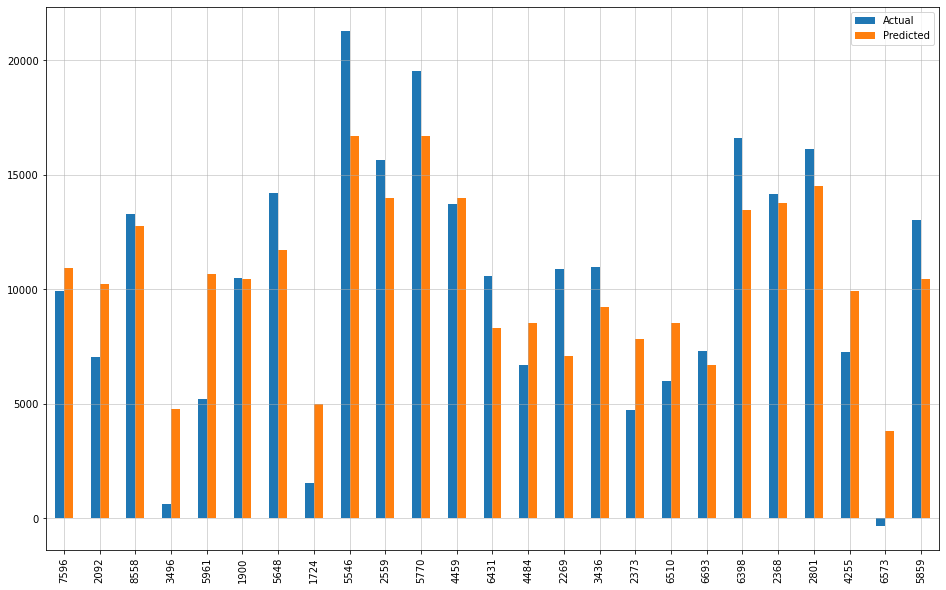

In [128]:
# Histogram of a subset of Predicted values and Actula values:

df1_plot = df1.head(25)
df1_plot.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()

In [83]:
# r_forest_model_2

r_forest_model_2 = RandomForestRegressor(n_estimators = 100, random_state = PARAMETER_CONSTANT)
r_forest_model_2.fit(X_train2,y_train2)
r_forest_model_2_pred = r_forest_model_2.predict(X_test2)

In [84]:
# r_forest_model_3

r_forest_model_3 = RandomForestRegressor(n_estimators = 100, random_state = PARAMETER_CONSTANT)
r_forest_model_3.fit(X_train3,y_train3)
r_forest_model_3_pred = r_forest_model_3.predict(X_test3)

**6.3 Evaluate the Model**

In this section the perfomamce of the algorithm/model is evaluated. This step is particularly important to compare how well the  different algorithms perform on a particular dataset. 
For regression algorithms: 
- Mean Squared Error : There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect. Since is no correct answer, the MSE’s basic value is in selecting one prediction model over another.
- 3 Root Mean Squared Error
- 4 r2 score (score varies between 0 and 100, 100 is perfect correlateld)
 

**1. LinearRegression() models evaluation**

In [85]:
# linear_model_1_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, linear_model_1_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test,linear_model_1_pred))

#Root Mean Squared Error: 4849.289445246519

# pd.get dummies for string values
# RMSE = 4858.6065

Root Mean Squared Error: 4849.585086888618
R2 score : 0.16


In [86]:
# linear_model_2_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, linear_model_2_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test2,linear_model_2_pred))


# We can see from The R2 score and Root Mean Squared Error Model 2 is less accurate than Model 2.
# Drop Model 2 Features

Root Mean Squared Error: 4847.570275069472
R2 score : 0.16


In [87]:
# linear_model_3_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test3, linear_model_3_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test3,linear_model_3_pred))

# Model 3 has similar accuracy to Model 1 with less variables.
# Root Mean Squared Error: 4888.8984561694215

Root Mean Squared Error: 4885.001636733577
R2 score : 0.15


**2. Ridge() models evaluation**

In [52]:
# ridge_model_1_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ridge_model_1_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test,ridge_model_1_pred))

# Standard RMSE: 4852.818834832482

# pd.get dummies for string values
# RMSE = 4862.473


NameError: name 'ridge_model_1_pred' is not defined

In [89]:
# ridge_model_2_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, ridge_model_2_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test2,ridge_model_2_pred))

# Standard RMSE: 4851.50534



Root Mean Squared Error: 4851.505348493496
R2 score : 0.16


In [98]:
# ridge_model_3_pred
 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test3, ridge_model_3_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test3,ridge_model_3_pred))

# Standard RMSE: 4884.9700



Root Mean Squared Error: 4884.970045117091
R2 score : 0.15


**3. RidgeCV models evaluation**

In [99]:
# ridgeCV_model_1_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ridgeCV_model_1_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test,ridgeCV_model_1_pred))


# Standard RMSE: 4850.01308

# pd.get dummies for string values
# RMSE = 4851.7201


Root Mean Squared Error: 4850.013082560951
R2 score : 0.16


In [100]:
# ridgeCV_model_2_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, ridgeCV_model_2_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test2,ridgeCV_model_2_pred))

# Standard RMSE: 4847.9838459



Root Mean Squared Error: 4847.983845950297
R2 score : 0.16


In [101]:
# ridgeCV_model_3_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test3, ridgeCV_model_3_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test3,ridgeCV_model_3_pred))


# Standard RMSE: 4927.21769



Root Mean Squared Error: 4884.970045117091
R2 score : 0.15


**4. Lasso models evaluation**

In [102]:
# lasso_model_1_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lasso_model_1_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test,lasso_model_1_pred))

# Standard RMSE: 4846.31350

# pd.get dummies for string values
# RMSE = 4856.1973


Root Mean Squared Error: 4846.313508356206
R2 score : 0.16


In [103]:
# lasso_model_2_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, lasso_model_2_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test2,lasso_model_2_pred))

# Standard RMSE: 4844.329638



Root Mean Squared Error: 4844.329638890553
R2 score : 0.16


In [104]:
# lasso_model_3_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test3, lasso_model_3_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test3,lasso_model_3_pred))


# Standard RMSE: 4922.33492


Root Mean Squared Error: 4880.17259799711
R2 score : 0.15


**5. BayesianRidge models evaluation**

In [55]:
# bayesianRidge_model_1_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, bayesianRidge_model_1_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test,bayesianRidge_model_1_pred))

# Standard RMSE: 4859.2078

# pd.get dummies for string values
# RMSE = 4853.596


NameError: name 'bayesianRidge_model_1_pred' is not defined

In [106]:
# bayesianRidge_model_2_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, bayesianRidge_model_2_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test2,bayesianRidge_model_2_pred))

# Standard RMSE: 4860.544985


Root Mean Squared Error: 4860.544985237194
R2 score : 0.16


In [107]:
# bayesianRidge_model_3_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test3, bayesianRidge_model_3_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test3,bayesianRidge_model_3_pred))


# Standard RMSE: 4880.69554


Root Mean Squared Error: 4880.695543090929
R2 score : 0.15


**6. LassoLars models evaluation**

In [108]:
# lassoLars_model_1_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lassoLars_model_1_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test,lassoLars_model_1_pred))

# Standard RMSE = 4850.8903

# pd.get dummies for string values
# RMSE = 4859.925


Root Mean Squared Error: 4850.890308345158
R2 score : 0.16


In [109]:
# lassoLars_model_2_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, lassoLars_model_2_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test2,lassoLars_model_2_pred))

# Standard RMSE: 4848.9189243



Root Mean Squared Error: 4848.918924326492
R2 score : 0.16


In [110]:
# lassoLars_model_3_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test3, lassoLars_model_3_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test3,lassoLars_model_3_pred))

# Standard RMSE: 4927.1980



Root Mean Squared Error: 4884.949306915651
R2 score : 0.15


**7. Decision Tree  models evaluation**

In [111]:
# decisionTree_model_1_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, decisionTree_model_1_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test,decisionTree_model_1_pred))

# Standard RMSE = 4742.9898

# pd.get dummies for string values
# RMSE = 4624.2366
# Standard RMSE: 4892.902723954407



Root Mean Squared Error: 4742.989844670016
R2 score : 0.20


In [112]:
# decisionTree_model_2_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, decisionTree_model_2_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test2,decisionTree_model_2_pred))

# Standard RMSE: 4661.92301



Root Mean Squared Error: 4661.923011225547
R2 score : 0.22


In [113]:
# decisionTree_model_3_pred

print('Mean Squared Error:', metrics.mean_squared_error(y_test3, decisionTree_model_3_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test3, decisionTree_model_3_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test3,decisionTree_model_3_pred))

# decisionTree_model_3_pred has the worst score yet
# Standard RMSE: 5833.7166




Mean Squared Error: 34032249.84207233
Root Mean Squared Error: 5833.716640536488
R2 score : -0.22


**7. RandomForestRegressor models evaluation**

In [114]:
# r_forest_model_1_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, r_forest_model_1_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test,r_forest_model_1_pred))

# Standard RMSE: 3274.247170
#R2 score : 0.62

#Standard scaler model
#Root Mean Squared Error: 3272.240437993073
#R2 score : 0.62

# pd.get dummies for string values
# RMSE = 3269.63612

# Barely any differince in using Standard Scaler thus it will not be used.


Root Mean Squared Error: 3274.2471700989227
R2 score : 0.62


In [115]:
# r_forest_model_2_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, r_forest_model_2_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test2,r_forest_model_2_pred))

# Standard RMSE: 3273.48815


Root Mean Squared Error: 3273.4881594896538
R2 score : 0.62


In [116]:
# r_forest_model_3_pred

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test3, r_forest_model_3_pred)))
print("R2 score : %.2f" % metrics.r2_score(y_test3,r_forest_model_3_pred))

# Standard RMSE: 4564.4410


Root Mean Squared Error: 4166.745700187419
R2 score : 0.38


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [131]:

result_dict = {'Model': ['linear_model_1','linear_model_2', 'linear_model_3', 'ridge_model_1','ridge_model_2',
                         'ridge_model_3','ridgeCV_model_1', 'ridgeCV_model_2','ridgeCV_model_3','lasso_model_1',
                         'lasso_model_2','lasso_model_3', 'bayesianRidge_model_1','bayesianRidge_model_2',
                         'bayesianRidge_model_3','lassoLars_model_1','lassoLars_model_2','lassoLars_model_3',
                         'decisionTree_model_1','decisionTree_model_2', 'decisionTree_model_3', 'r_forest_model_1',
                         'r_forest_model_2', 'r_forest_model_3'],
                'Root Mean Squared Error': [np.sqrt(metrics.mean_squared_error(y_test, linear_model_1_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test2, linear_model_2_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test3, linear_model_3_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test, ridge_model_1_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test2, ridge_model_2_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test3, ridge_model_3_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test, ridgeCV_model_1_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test2, ridgeCV_model_2_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test3, ridgeCV_model_3_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test, lasso_model_1_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test2, lasso_model_2_pred)), 
                                           np.sqrt(metrics.mean_squared_error(y_test3, lasso_model_3_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test, bayesianRidge_model_1_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test2, bayesianRidge_model_2_pred)), 
                                           np.sqrt(metrics.mean_squared_error(y_test3, bayesianRidge_model_3_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test, lassoLars_model_1_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test2, lassoLars_model_2_pred)), 
                                           np.sqrt(metrics.mean_squared_error(y_test3, lassoLars_model_3_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test, decisionTree_model_1_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test2, decisionTree_model_2_pred)), 
                                           np.sqrt(metrics.mean_squared_error(y_test3, decisionTree_model_3_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test, r_forest_model_1_pred)),
                                           np.sqrt(metrics.mean_squared_error(y_test2, r_forest_model_2_pred)), 
                                           np.sqrt(metrics.mean_squared_error(y_test3, r_forest_model_3_pred))]}

results_df = pd.DataFrame(result_dict)



In [132]:
results_df.sort_values('Root Mean Squared Error', ascending = True)

,Model,Root Mean Squared Error
22,r_forest_model_2,3273.488159
21,r_forest_model_1,3274.247170
23,r_forest_model_3,4166.745700
19,decisionTree_model_2,4661.923011
18,decisionTree_model_1,4742.989845
10,lasso_model_2,4844.329639
9,lasso_model_1,4846.313508
1,linear_model_2,4847.570275
7,ridgeCV_model_2,4847.983846
16,lassoLars_model_2,4848.918924


In [ ]:
# Choose best model and motivate why it is the best choice

In [ ]:
# r_forest_model_1 RMSE = 3274.247170
# r_forest_model_2 RMSE = 3273.488159

# As we can see the RandomForestRegressor is the two models with lowest RMSE.
# We can see above the difference between the RMSE between model_1 and model_2 is 0.75901
# which is a small difference, for this reason r_forest_model_1 with Group 1 Features is the chosen model.
# r_forest_model_1 has more features than r_forest_model_2, thus it can be see as more inclusive , especially 
# since the difference between the RMSE of the model is so small.

<a id="seven"></a>
## 8. Model Explanations
<a class="anchor" id="1.1"></a>


In [90]:
# discuss chosen methods logic


In [89]:
    ### Kaggle test model submission

In [90]:
# Process test_df data to be able to use the model

In [ ]:
# r_forest_model_1 

In [123]:
# Prediction on test data with model 1 features

# import data
test_df = pd.read_csv('df_test.csv')

# Remove null values

test_df['Valencia_pressure'] = test_df['Valencia_pressure'].fillna(test_df['Valencia_pressure'].mean())

# drop columns
#test_df.drop('Valencia_wind_deg', axis= 1, inplace= True)
#test_df.drop('Seville_pressure', axis= 1, inplace= True)

# Create new features

test_df['time'] = pd.to_datetime(test_df['time'], format = '%Y-%m-%d %H:%M:%S')

test_df['month'] = test_df['time'].dt.month
test_df['day'] = test_df['time'].dt.day
test_df['hour'] = test_df['time'].dt.hour
test_df[['month', 'day', 'hour']] = test_df[['month', 'day', 'hour']].astype('category')
#time = test_df['time']
#test_df.drop('time', axis = 1)
# these are the variable used fro all model_1

test_df_1 = test_df[['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
        'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all',
        'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg',
        'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all',
        'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h',
        'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
        'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
        'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
        'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
        'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
        'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
        'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
        'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
        'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
        'Madrid_temp', 'Madrid_temp_min', 'month', 'day', 'hour']]


y_pred1 = r_forest_model_1.predict(test_df_1)

y_pred1_df = test_df_1
y_pred1_df['time'] = test_df['time']
y_pred1_df['load_shortfall_3h'] =  y_pred1
y_pred1_test_df = y_pred1_df[['time', 'load_shortfall_3h']]

# Save the predicted output as a csv file.

#y_pred1_test_df[['time', 'load_shortfall_3h']].to_csv('y_pred1_test_df.csv', index=False)

<a id="seven"></a>
## 9. Conclusion 
<a class="anchor" id="1.1"></a>